In [1]:
# MODIFY! 
# use Robust! 
model_name = 'poi-baseline-wo'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/d-wo-ns.csv')

In [4]:
# df.columns

In [5]:
# df.head()

In [6]:
df.shape

(2141, 87)

In [7]:
# df.info()

In [8]:
X = df.drop('throughput',axis=1)

In [9]:
X.shape

(2141, 86)

In [10]:
y = df['throughput']

In [11]:
y.shape

(2141,)

In [12]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate model
from sklearn.linear_model import PoissonRegressor
model = PoissonRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [13]:
model

PoissonRegressor()

In [14]:
mae

3.4416226649119923

In [15]:
mse

19.86167024471069

In [16]:
rmse

4.456643383165259

In [17]:
err_df = pd.DataFrame(data=[mae, mse, rmse],index=['MAE','MSE','RMSE'],columns=[f'{model_name}'])
err_df

,poi-baseline-wo
MAE,3.441623
MSE,19.861670
RMSE,4.456643


In [18]:
err_df.to_csv(f'./baseline-err/{model_name}.csv')

In [19]:
y_pred_df = pd.DataFrame(y_pred, columns=['throughput_pred'])
y_pred_df.describe().drop('count')
# no negative predictions

,throughput_pred
mean,13.043937
std,5.446364
min,1.014136
25%,8.901596
50%,12.020404
75%,16.352951
max,34.610373


<AxesSubplot:ylabel='Count'>

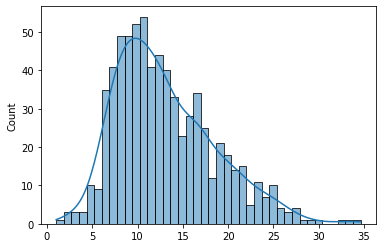

In [20]:
sns.histplot(y_pred,bins=40,kde=True)
# the distribution better reflects the true distribution of the data set

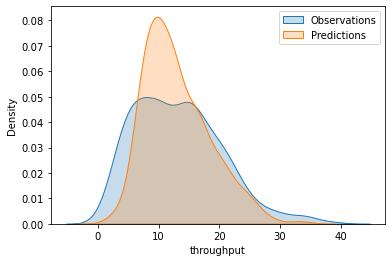

In [21]:
fig,ax = plt.subplots()

sns.kdeplot(y_test, ax=ax, shade=True, label='Observations')
sns.kdeplot(y_pred, ax=ax,shade=True,label='Predictions')

ax.legend(loc='best')

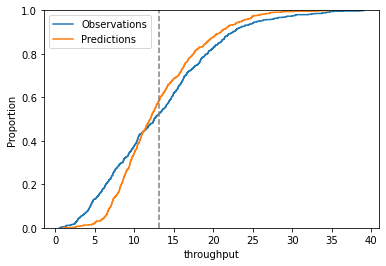

In [22]:
fig,ax = plt.subplots()

sns.ecdfplot(y_test, ax=ax, label='Observations')
sns.ecdfplot(y_pred, ax=ax,label='Predictions')
plt.axvline(x=y.mean(),color='grey',linestyle='--')

ax.legend(loc='best')

In [23]:
# y.describe().drop(['count'])

In [24]:
res = y_test - y_pred
res.describe().drop('count')

mean     0.162439
std      4.456835
min    -13.398636
25%     -2.886394
50%     -0.473587
75%      2.600106
max     20.906858
Name: throughput, dtype: float64

<AxesSubplot:xlabel='throughput', ylabel='Count'>

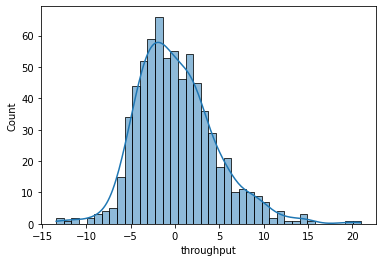

In [25]:
sns.histplot(data=res, kde=True,bins=40)

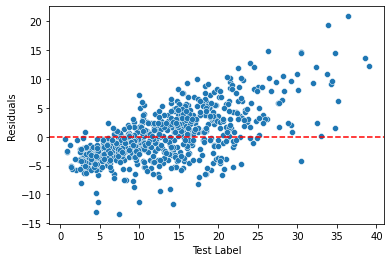

In [26]:
ax = sns.scatterplot(x=y_test, y=res)
ax.set(ylabel='Residuals', xlabel='Test Label')
plt.axhline(y=0,color='red',linestyle='--')

# there should be no clear pattern / curve in the plot
# we see a positive correlation between Test Label and Residuals -> later models should avoid this pattern

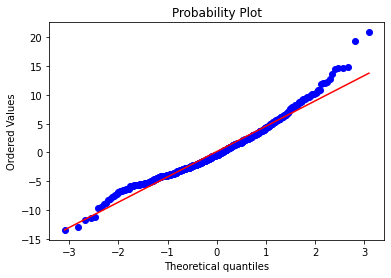

In [27]:
import scipy as sp

fig, ax = plt.subplots()
sp.stats.probplot(res,plot=ax);

In [28]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X_poisson = scaler.transform(X)

poisson_model = PoissonRegressor()
poisson_model.fit(X_poisson,y)

PoissonRegressor()

In [29]:
model.coef_

array([ 8.68181619e-03,  1.37534253e-02,  3.81228501e-03, -2.89456626e-02,
        2.77291625e-02, -7.19401290e-03, -2.40853757e-02,  9.98014866e-02,
        5.49966777e-02,  2.49715874e-02, -2.92050724e-03, -3.68520987e-02,
        3.37175535e-01, -1.23900730e-01, -5.96143622e-03, -2.07462555e-02,
       -1.62299670e-02, -6.74328443e-03,  8.06844408e-03, -1.27881238e-02,
        4.72798977e-03,  1.90618771e-02,  2.45220687e-03,  7.56142803e-03,
        2.86633841e-03,  6.40222031e-03,  4.82572725e-03,  1.17668109e-02,
        9.04739872e-03, -1.19498984e-02, -5.27552812e-05,  4.10121828e-03,
       -3.37990368e-02, -1.84550072e-02,  3.30440548e-02,  2.49530694e-02,
        7.74796978e-03, -3.69490242e-02, -3.16451753e-02, -9.82638909e-03,
        8.46291309e-03,  1.71449190e-02,  1.14609681e-02, -1.06379386e-02,
       -1.96478658e-02,  7.50564151e-03, -2.25193470e-02, -5.16829982e-03,
       -7.46893407e-03,  1.40166888e-02, -2.71501100e-02, -3.92466007e-02,
        0.00000000e+00, -

In [30]:
# coef_df = pd.DataFrame(data=model.coef_,index=X.columns,columns=['beta'])
# coef_df

In [31]:
poisson_model.coef_

array([ 4.39141590e-03,  1.39153779e-02,  2.42694491e-03, -2.14924553e-02,
        3.36577508e-02, -3.25455072e-03, -1.06221678e-02,  9.71270796e-02,
        5.06925530e-02,  2.75360015e-02, -4.49888992e-04, -4.25291803e-02,
        3.40876312e-01, -1.21135739e-01,  3.80062707e-04, -1.53621128e-02,
       -1.50443873e-02, -5.95072114e-03,  5.61292275e-03, -3.63214866e-03,
        7.39826226e-03,  1.85893295e-02,  7.64719297e-03,  1.50687508e-02,
       -1.48064084e-03,  2.20399890e-03,  4.51321956e-03,  1.39851995e-02,
        7.83034933e-03, -1.07194229e-02,  2.11482380e-03,  2.72010323e-03,
       -2.74571017e-02, -1.48920475e-02,  3.10647737e-02,  3.04358254e-02,
        1.00902972e-02, -3.47694419e-02, -4.00861880e-02, -2.88093612e-02,
        1.12463052e-02,  1.70165383e-02,  1.22415525e-02, -2.24872453e-02,
       -1.99009301e-02,  6.41195697e-03, -1.79669827e-02, -3.40439080e-03,
       -6.79440006e-03,  4.41068789e-03, -1.88694991e-02, -3.17783470e-02,
       -1.96969543e-02, -

In [32]:
# coef_df = pd.DataFrame(data=poisson_model.coef_,index=X.columns,columns=['beta'])
# coef_df

In [33]:
delta_df = pd.DataFrame(data=poisson_model.coef_ - model.coef_,index=X.columns,columns=['delta_beta'])
delta_df

,delta_beta
distance,-0.004290
lat,0.000162
lon,-0.001385
alt,0.007453
speed,0.005929
...,...
region_urban,-0.004966
weekday_Monday,0.004840
weekday_Thursday,0.000747
weekday_Tuesday,-0.003254


In [34]:
pd.set_option('display.max_columns',None)
delta_df.sort_values('delta_beta').sort_values('delta_beta').transpose()

,ci_28368651,ci_27771906,ci_28365056,ci_29563904,ci_28368384,ci_30422273,ci_27771905,ci_33527559,region_highway,ci_33527552,ta,ci_29401601,region_urban,ci_29391105,ci_26796291,rsrq,distance,ci_27029251,weekday_Tuesday,ci_29913344,rsrp,ci_29913346,ci_26378755,ci_27770889,lon,ci_27770885,ci_27299331,ci_28365058,ci_29391104,ci_29391106,ci_26385409,region_suburban,ci_27256324,ci_28365057,ci_27771908,weekday_Wednesday,lat,ci_29908736,ci_29568768,ci_28367106,ci_31281409,ci_31263232,weekday_Thursday,ci_27771909,ci_26378754,ci_26378498,ci_27299332,ci_29398276,ci_28371200,ci_29913345,ci_28367105,ci_27770883,ci_27771904,ci_27256325,ci_28371202,ci_27771140,ci_30492930,cqi,sinr,ci_26385408,rtt,ci_27771907,ci_29568770,ci_27770888,payload,acc,ci_28365063,ci_33527554,weekday_Monday,ci_33837570,ci_26385410,ci_26378497,ci_27771139,speed,hour,ci_27770886,alt,ci_28368642,ci_26796290,ci_28368386,ci_26379013,ci_33527561,ci_33519104,dir,ci_28371201,ci_29568769
delta_beta,-0.019697,-0.018983,-0.011849,-0.010887,-0.009606,-0.008597,-0.008441,-0.008045,-0.008008,-0.006393,-0.005677,-0.005184,-0.004966,-0.004741,-0.004347,-0.004304,-0.00429,-0.004198,-0.003254,-0.003085,-0.002674,-0.002519,-0.002456,-0.001979,-0.001385,-0.001381,-0.001217,-0.001094,-0.000886,-0.000673,-0.000473,-0.000333,-0.000313,-0.000253,-0.000128,-0.000118,0.000162,0.000517,0.000606,0.000675,0.000689,0.000709,0.000747,0.000781,0.000793,0.001186,0.00123,0.001538,0.001679,0.001694,0.001764,0.002168,0.00218,0.002218,0.002334,0.002342,0.002443,0.002471,0.002564,0.00267,0.002765,0.002783,0.003219,0.003563,0.003701,0.003939,0.004552,0.004596,0.00484,0.004848,0.005195,0.005384,0.005483,0.005929,0.006341,0.006342,0.007453,0.007468,0.007507,0.008281,0.009156,0.011962,0.01244,0.013463,0.014191,0.015077


<AxesSubplot:ylabel='Count'>

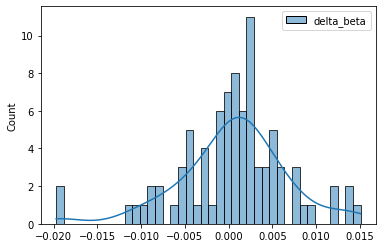

In [35]:
sns.histplot(data=delta_df,bins=40,kde=True)

In [36]:
y_pred_poisson = poisson_model.predict(X_poisson)

<AxesSubplot:ylabel='Count'>

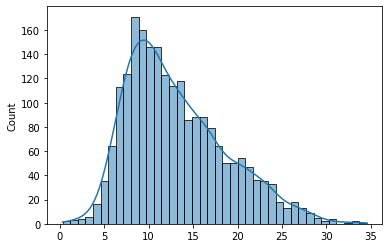

In [37]:
sns.histplot(y_pred_poisson,bins=40,kde=True)

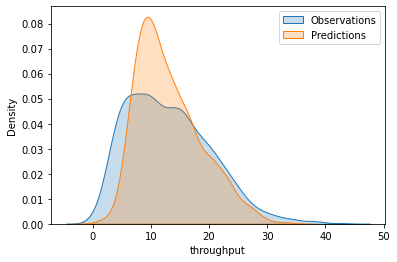

In [38]:
fig,ax = plt.subplots()

sns.kdeplot(y, ax=ax, shade=True, label='Observations')
sns.kdeplot(y_pred_poisson, ax=ax,shade=True,label='Predictions')

ax.legend(loc='best')

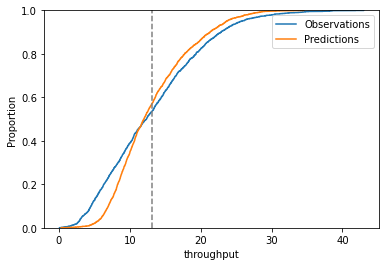

In [39]:
fig,ax = plt.subplots()

sns.ecdfplot(y, ax=ax, label='Observations')
sns.ecdfplot(y_pred_poisson, ax=ax,label='Predictions')
plt.axvline(x=y.mean(),color='grey',linestyle='--')

ax.legend(loc='best')

In [40]:
mae = mean_absolute_error(y,y_pred_poisson)
mse = mean_squared_error(y,y_pred_poisson)
rmse = np.sqrt(mse)

In [41]:
err_df = pd.DataFrame(data=[mae, mse, rmse],index=['MAE','MSE','RMSE'],columns=['PR'])
err_df

,PR
MAE,3.216113
MSE,17.816642
RMSE,4.220976


In [42]:
# err_df.to_csv('./model-err/poi-model-err.csv')

In [43]:
from joblib import dump, load
dump(poisson_model, f'./baseline-models/{model_name}.joblib')

['./baseline-models/poi-baseline-wo.joblib']

DONE!